In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
import matplotlib.colors as colors
from scripts.conversion import *
import pandas as pd
from sklearn.metrics import average_precision_score, precision_recall_curve
import energyflow as ef


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [73]:
def data_mini_batch_splitter(_data, batch_size,seed=0):
    """
    Split data into mini batches of size batch_size, after shuffling
    """
    data = _data.copy()
    np.random.seed(seed)
    np.random.shuffle(data)
   # print(data[0:10])
    n_batches = int(np.ceil(len(data)/batch_size))
    batches = []
    for i in range(n_batches):
        batches.append(data[i*batch_size:(i+1)*batch_size])
    return batches

def disco_mini_batch(vector1, vector2, batch_size,seed=0):
    """
    Calculate the distance correlation between two vectors split into mini batches
    """
    vector1_mini_batches = data_mini_batch_splitter(vector1, batch_size,seed=seed)
    vector2_mini_batches = data_mini_batch_splitter(vector2, batch_size,seed=seed)

    dcor_list = []
    for i in range(len(vector1_mini_batches)):
        dcor_list.append(dcor.u_distance_correlation_sqr(vector1_mini_batches[i], vector2_mini_batches[i]))

    return np.mean(dcor_list), np.std(dcor_list)

In [3]:
cd ..

/home/rd804/discriminator-metric


In [36]:
print(weight)

[1.0049213 1.0094113 1.0119873 ... 1.0246804 1.0088769 1.0100886]


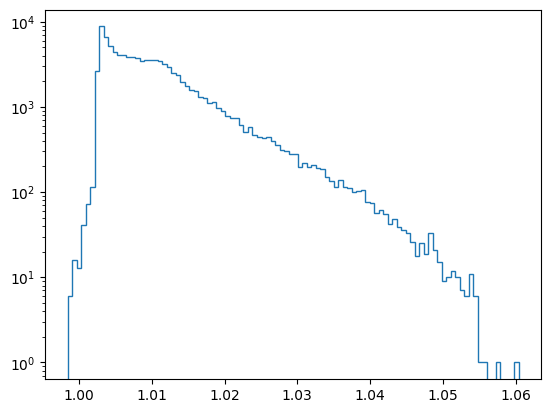

In [38]:
plt.hist(weight, bins=100,histtype='step', label='weight')
plt.yscale('log')
#plt.xlim(0, 0.1)
plt.show()

In [69]:
# percentile cuts of weight

percentiles = [0.5,1,5,10,20,30,40,50,60,70,80,90,95,99,99.5]

label = pd.read_hdf('data/jetnet30_data.h5', f'labels__truth_valid')['labels'].values

disco_less = []
disco_more = []

for percentile in percentiles:
    cut = np.percentile(weight, percentile)
   # plt.hist(weight[label==0], bins=100,histtype='step', label='weight', density=True)
   # plt.hist(weight[label==1], bins=100,histtype='step', label='weight', density=True)

    weight_less_cut = weight[weight<cut]
    weight_more_cut = weight[weight>cut]
    label_less_cut = label[weight<cut]
    label_more_cut = label[weight>cut]
    print(f'percentile: {percentile}')

    disco_less_cut,_  = disco_mini_batch(weight_less_cut, label_less_cut,batch_size=2048)
    disco_more_cut,_  = disco_mini_batch(weight_more_cut, label_more_cut,batch_size=2048)

    disco_less.append(disco_less_cut)
    disco_more.append(disco_more_cut)

    

percentile: 0.5


/home/rd804/.conda/envs/discr-metric/lib/python3.8/site-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(float32, 1d, C), array(int64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(


percentile: 1
percentile: 5
percentile: 10
percentile: 20
percentile: 30
percentile: 40
percentile: 50
percentile: 60
percentile: 70
percentile: 80
percentile: 90
percentile: 95
percentile: 99
percentile: 99.5


In [93]:
# percentile cuts of weight

trial = 1
distortion = 'truth'
epoch = 4
score_val = np.load(f'output/trial_{trial}_pn_{distortion}/best_model_val_auc.npy')[:,0]
weight = score_val/(1-score_val)

percentiles = [0.5,1,5,10,20,30,40,50,60,70,80,90,95,99,99.5]

label = pd.read_hdf('data/jetnet30_data.h5', f'labels__truth_valid')['labels'].values

disco_less = []
disco_more = []

disco_less_std = []
disco_more_std = []

for percentile in percentiles:
    cut = np.percentile(weight, percentile)
   # plt.hist(weight[label==0], bins=100,histtype='step', label='weight', density=True)
   # plt.hist(weight[label==1], bins=100,histtype='step', label='weight', density=True)

    weight_less_cut = weight[weight<cut]
    weight_more_cut = weight[weight>cut]
    label_less_cut = label[weight<cut]
    label_more_cut = label[weight>cut]
    print(f'percentile: {percentile}')

    disco_less_cut,disco_less_cut_std  = disco_mini_batch(weight_less_cut, label_less_cut,batch_size=2048)
    disco_more_cut, disco_more_cut_std  = disco_mini_batch(weight_more_cut, label_more_cut,batch_size=2048)

    disco_less.append(disco_less_cut)
    disco_more.append(disco_more_cut)

    disco_less_std.append(disco_less_cut_std)
    disco_more_std.append(disco_more_cut_std)

    

percentile: 0.5
percentile: 1
percentile: 5
percentile: 10
percentile: 20
percentile: 30
percentile: 40
percentile: 50
percentile: 60
percentile: 70
percentile: 80
percentile: 90
percentile: 95
percentile: 99
percentile: 99.5


In [97]:
# percentile cuts of weight

trial = 1
distortion = 'truth'
epoch = 4
score_val = np.load(f'output/trial_{trial}_pn_{distortion}/best_model_val_auc.npy')[:,0]
weight = score_val/(1-score_val)

percentiles = [0.5,1,5,10,20,30,40,50,60,70,80,90,95,99,99.5]

label = pd.read_hdf('data/jetnet30_data.h5', f'labels__truth_valid')['labels'].values

disco_less = []
disco_more = []

disco_less_std = []
disco_more_std = []

for percentile in percentiles:
    cut = np.percentile(weight, percentile)

    weight_0 = weight[label==0]
    weight_1 = weight[label==1]
    weight_0_less_cut = weight_0[weight_0<cut]
    weight_0_more_cut = weight_0[weight_0>cut]
    weight_1_less_cut = weight_1[weight_1<cut]
    weight_1_more_cut = weight_1[weight_1>cut]

    print(f'percentile: {percentile}')

    disco_less_cut,disco_less_cut_std  = disco_mini_batch(weight_0_less_cut, weight_1_less_cut,batch_size=2048)
    disco_more_cut, disco_more_cut_std  = disco_mini_batch(weight_0_more_cut, weight_1_more_cut,batch_size=2048)

    disco_less.append(disco_less_cut)
    disco_more.append(disco_more_cut)

    disco_less_std.append(disco_less_cut_std)
    disco_more_std.append(disco_more_cut_std)

    

percentile: 0.5


/home/rd804/.conda/envs/discr-metric/lib/python3.8/site-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(float32, 1d, C), array(float32, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(


AssertionError: 

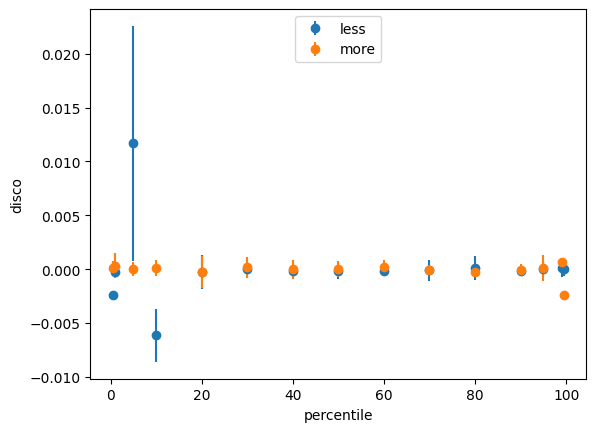

In [94]:
# plot disco vs percentile with disco_std as error bars

plt.errorbar(percentiles, disco_less, yerr=disco_less_std, label='less', fmt='o')
plt.errorbar(percentiles, disco_more, yerr=disco_more_std, label='more', fmt='o')
plt.xlabel('percentile')
plt.ylabel('disco')
plt.legend(loc='upper center')
plt.show()


In [52]:
import dcor

In [95]:
# percentile cuts of weight

trial = 3
distortion = 'tailcut'
score_val = np.load(f'output/test_{trial}_cartesian_particlenet/best_model_val_auc.npy')[:,0]
weight = score_val/(1-score_val)

percentiles = [0.5,1,5,10,20,30,40,50,60,70,80,90,95,99,99.5]

label = pd.read_hdf('data/jetnet30_data.h5', f'labels__tailcut_valid')['labels'].values

disco_less = []
disco_more = []

disco_less_std = []
disco_more_std = []

for percentile in percentiles:
    cut = np.percentile(weight, percentile)
   # plt.hist(weight[label==0], bins=100,histtype='step', label='weight', density=True)
   # plt.hist(weight[label==1], bins=100,histtype='step', label='weight', density=True)

    weight_less_cut = weight[weight<cut]
    weight_more_cut = weight[weight>cut]
    label_less_cut = label[weight<cut]
    label_more_cut = label[weight>cut]
    print(f'percentile: {percentile}')

    disco_less_cut, disco_less_cut_std  = disco_mini_batch(weight_less_cut, label_less_cut,batch_size=2048)
    disco_more_cut, disco_more_cut_std = disco_mini_batch(weight_more_cut, label_more_cut,batch_size=2048)

    disco_less.append(disco_less_cut)
    disco_more.append(disco_more_cut)

    disco_less_std.append(disco_less_cut_std)
    disco_more_std.append(disco_more_cut_std)

    

    


percentile: 0.5
percentile: 1
percentile: 5
percentile: 10
percentile: 20
percentile: 30
percentile: 40
percentile: 50
percentile: 60
percentile: 70
percentile: 80
percentile: 90
percentile: 95
percentile: 99
percentile: 99.5


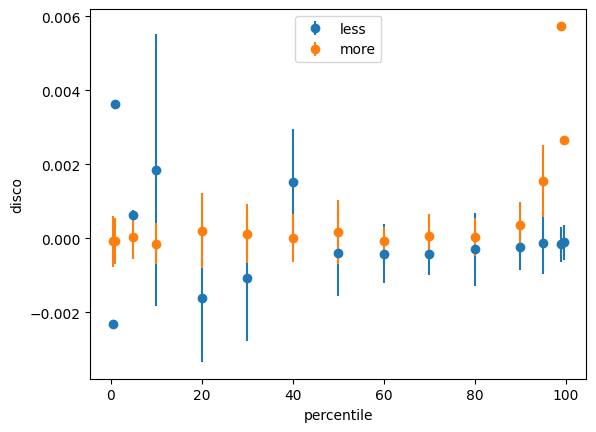

In [96]:
# plot disco vs percentile with disco_std as error bars

plt.errorbar(percentiles, disco_less, yerr=disco_less_std, label='less', fmt='o')
plt.errorbar(percentiles, disco_more, yerr=disco_more_std, label='more', fmt='o')
plt.xlabel('percentile')
plt.ylabel('disco')
plt.legend(loc='upper center')
plt.show()


In [14]:
trial = 4
distortion = 'truth'
score_val = np.load(f'output/trial_{trial}_pn_{distortion}/best_model_val_auc.npy')[:,0]
weight = score_val/(1-score_val)

jets = pd.read_hdf('data/jetnet30_data.h5', f'particle_data_{distortion}_valid').values.reshape(-1,30,4)
label = pd.read_hdf('data/jetnet30_data.h5', f'labels__{distortion}_valid')['labels'].values
mjj = mjj_jets(jets)



percentile: 0.5, hist_diff_2: 10.295660589985104


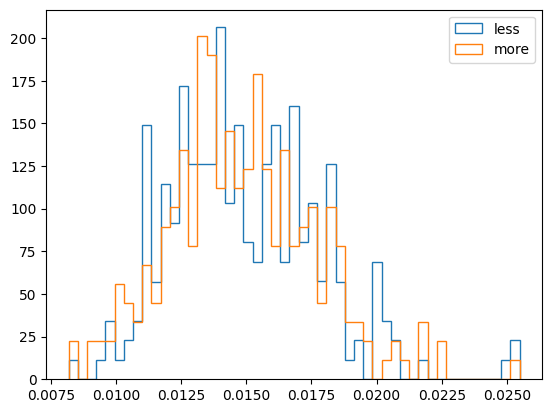

percentile: 1, hist_diff_2: 3.3743358526279796


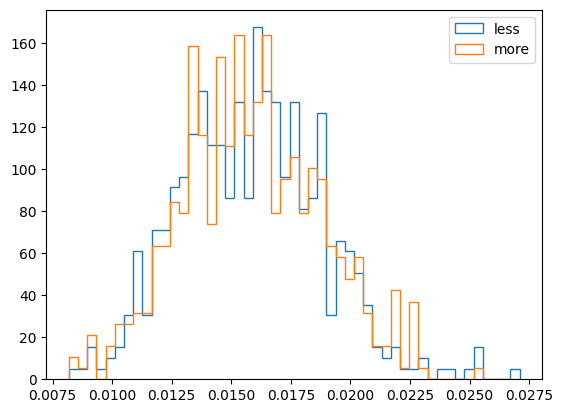

percentile: 5, hist_diff_2: 0.032459864822114805


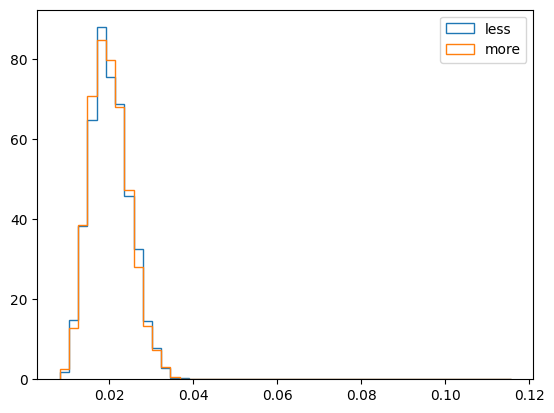

percentile: 10, hist_diff_2: 0.03991599180076623


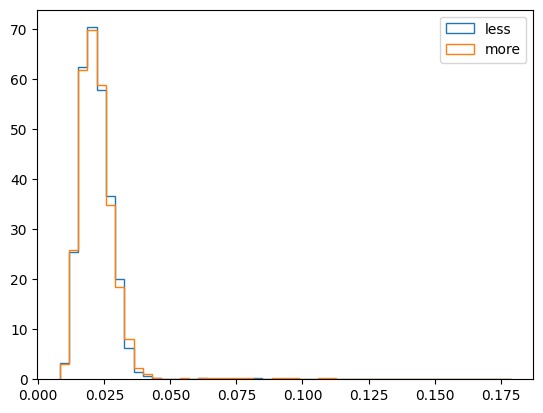

percentile: 20, hist_diff_2: 0.03991599180076623


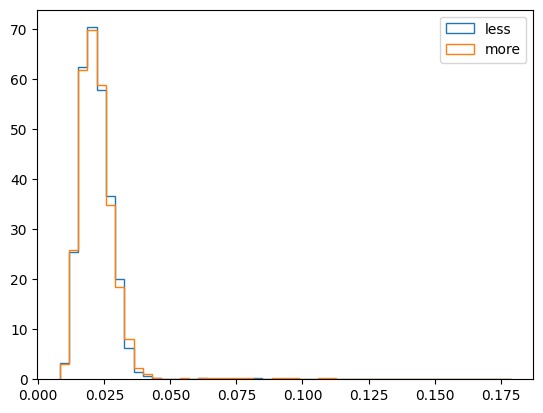

percentile: 30, hist_diff_2: 0.03991599180076623


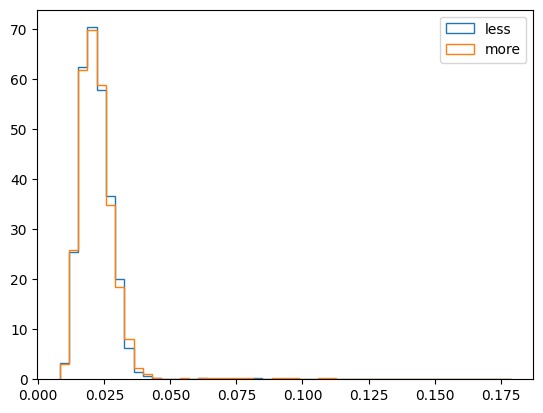

percentile: 40, hist_diff_2: 0.03991599180076623


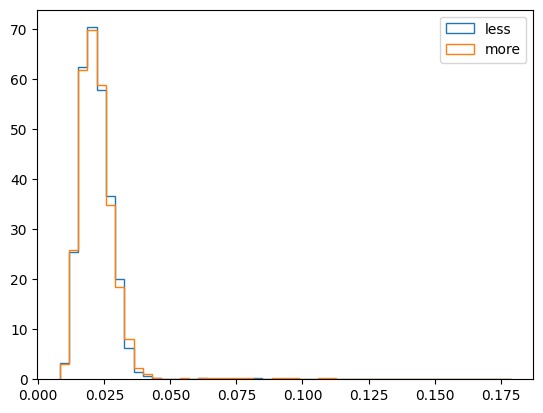

percentile: 50, hist_diff_2: 0.03991599180076623


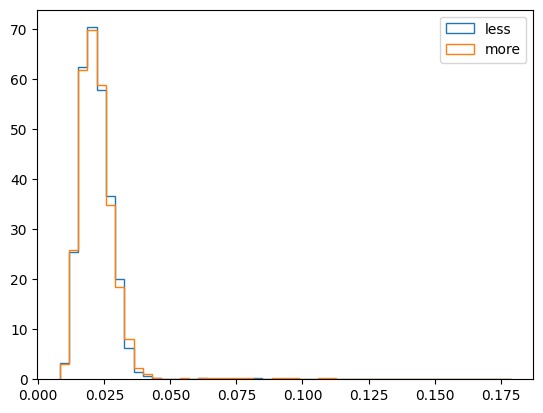

percentile: 60, hist_diff_2: 0.03991599180076623


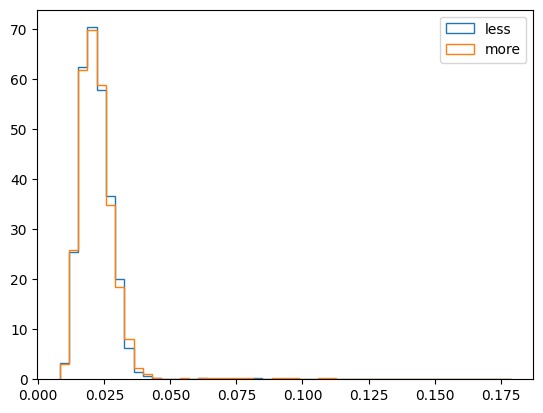

percentile: 70, hist_diff_2: 0.005786598747297856


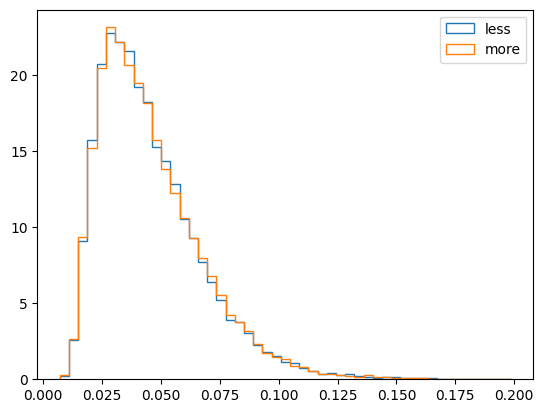

percentile: 80, hist_diff_2: 0.006353886547047823


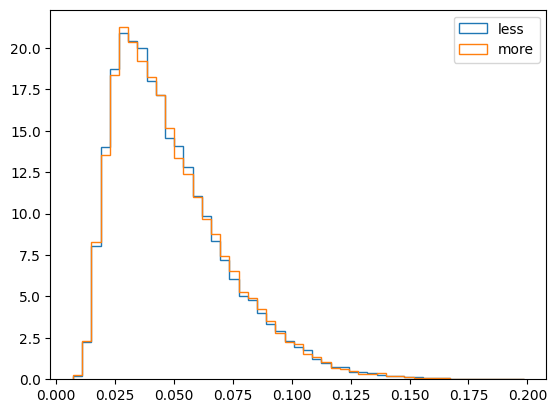

percentile: 90, hist_diff_2: 0.0041981769334705306


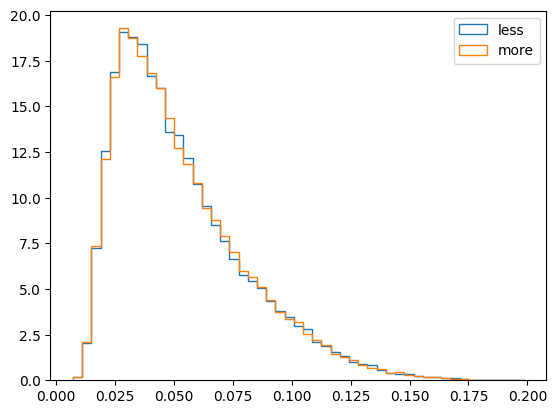

percentile: 95, hist_diff_2: 0.0037375711078739284


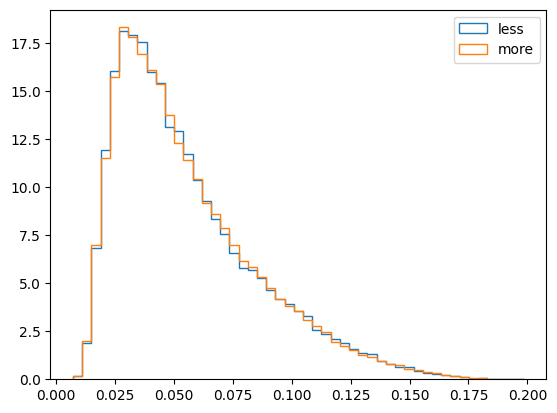

percentile: 99, hist_diff_2: 0.004288997975977045


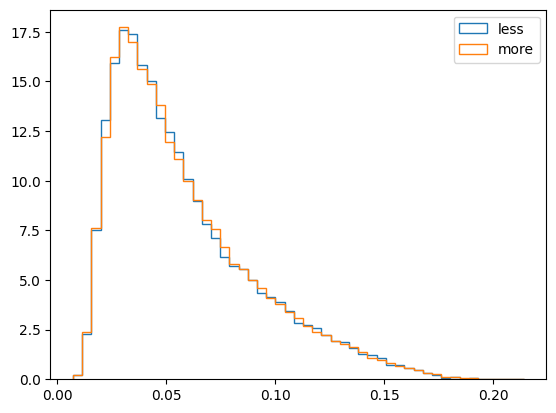

percentile: 99.5, hist_diff_2: 0.004006086712824326


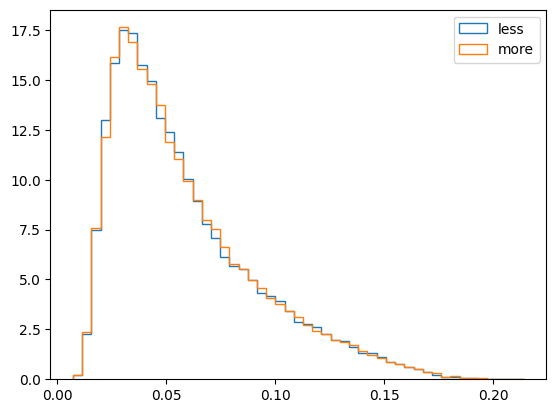

In [34]:
percentiles = [0.5,1,5,10,20,30,40,50,60,70,80,90,95,99,99.5]

for percentile in percentiles:
    # histogram difference with percentile cut
    cut = np.percentile(weight, percentile)
    weight_0 = weight[label==0]
    weight_1 = weight[label==1]

    mjj_jets_0 = mjj[label==0]
    mjj_jets_1 = mjj[label==1]


    mjj_jets_less_0_cut = mjj_jets_0[weight_0<cut]
    mjj_jets_less_1_cut = mjj_jets_1[weight_1<cut]


    bins = np.linspace(min(min(mjj_jets_less_0_cut),min(mjj_jets_less_1_cut)),
                     max(max(mjj_jets_less_0_cut),max(mjj_jets_less_1_cut)), 
                     50)

    hist_less_cut_0, bins = np.histogram(mjj_jets_less_0_cut, bins=bins, density=True)
    hist_less_cut_1, bins = np.histogram(mjj_jets_less_1_cut, bins=bins, density=True)

    hist_diff_2 = np.mean((hist_less_cut_0 - hist_less_cut_1)**2/
                          (hist_less_cut_0 + hist_less_cut_1 + 10**-10))
    print(f'percentile: {percentile}, hist_diff_2: {hist_diff_2}')

    plt.hist(mjj_jets_less_0_cut, bins=bins, histtype='step', label='less', density=True)
    plt.hist(mjj_jets_less_1_cut, bins=bins, histtype='step', label='more', density=True)
    plt.legend(loc='upper right')
    plt.show()
